In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
print("done")

done


In [2]:
tk = th.Thicket.from_caliperreader(glob("calimpi/*.cali"))
# tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Variance time/rank", "Total time"], axis = 1)
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time", "Min time/rank", "Max time/rank", "Variance time/rank"], axis = 1)
print("done")

done


In [3]:
tk.dataframe

Avg time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              54742            1.659786   
                                                  16665350      1545.713145   
                                                  46573885         1.704529   
                                                  113054423       97.470774   
                                                  137206880        2.083879   
                                                  169134994     6139.382903   
                                                  218453390        7.701300   
                                                  235878511     1545.787137   
                                                  266862779        3.823825   
                                                  308979251        2.142030   
                                                  310714740        0.753515   
                                                  390174632        2.007377   
                                                  419300545        2.625385   
                                                  438240877      383.002009   
                                                  448274351        3.209547   
                                                  456903347        0.763438   
                                                  459501603      386.756453   
                                                  502937321        7.426337   
                                                  503201416        3.282762   
                                                  563334250       97.354054   
                                                  587548822        2.297660   
                                                  597608825       25.831545   
                                                  612447228     1534.699223   
                                                  614741484        1.518996   
                                                  649018386      381.727526   
                                                  651320739        2.001599   
                                                  670568076        3.290850   
                                                  672472964        3.039209   
                                                  714347708        1.971647   
                                                  719727626       25.329990   
                                                  732978140        3.285295   
                                                  746349878       97.231251   
                                                  771192951        2.885384   
                                                  829406688       99.933215   
                                                  901237194        1.396392   
                                                  906135823        2.594816   
                                                  909209345        0.597387   
                                                  918134408     1528.622678   
                                                  918684573       24.423697   
                                                  926222619        2.197437   
                                                  982633814        2.278305   
                                                  985594638        2.014217   
                                                  1021423122    1544.683978   
                                                  1040490155       3.265824   
                                                  1069271388      96.583353   
                                                  1074415694    1549.043712   
                                                  1142061711       4.098158   
                                                  1172125404      24.432372   
                                                  1182596808       4.140494   
                                 

In [4]:
gb = tk.groupby(["InputSize","InputType"])

28  thickets created...
{(65536, '1%perturbed'): <thicket.thicket.Thicket object at 0x2b85ddd5fa00>, (65536, 'Random'): <thicket.thicket.Thicket object at 0x2b85ddddae80>, (65536, 'ReverseSorted'): <thicket.thicket.Thicket object at 0x2b85ddec2be0>, (65536, 'Sorted'): <thicket.thicket.Thicket object at 0x2b85dde84610>, (262144, '1%perturbed'): <thicket.thicket.Thicket object at 0x2b85dde8e790>, (262144, 'Random'): <thicket.thicket.Thicket object at 0x2b85ddd4b190>, (262144, 'ReverseSorted'): <thicket.thicket.Thicket object at 0x2b85dde4f580>, (262144, 'Sorted'): <thicket.thicket.Thicket object at 0x2b85dde6bdc0>, (1048576, '1%perturbed'): <thicket.thicket.Thicket object at 0x2b85ddcde9d0>, (1048576, 'Random'): <thicket.thicket.Thicket object at 0x2b85dde17730>, (1048576, 'ReverseSorted'): <thicket.thicket.Thicket object at 0x2b85ddbe6f70>, (1048576, 'Sorted'): <thicket.thicket.Thicket object at 0x2b85dddbf550>, (4194304, '1%perturbed'): <thicket.thicket.Thicket object at 0x2b85ddd62880

In [5]:
# gbType = tk.groupby("InputType")
# input_types = gbType.keys()
# dfs = {}
# for key in gbType.keys():
#     thk = gbType[key]
#     gb = thk.groupby("InputSize")
#     ctk = th.Thicket.concat_thickets(
#         thickets=list(gb.values()),
#         headers=list(gb.keys()),
#         axis="columns",
#         metadata_key="num_procs"
#     )

#     ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
#     ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
#     dfs[key] = ctk

# dfs['Random'].dataframe

ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [6]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [7]:
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
array_sizes1 = sorted(list(set(ctk.dataframe.columns.get_level_values(0))))

In [8]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    # plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [9]:
array_sizes = []
for pair in array_sizes1:
    array_sizes.append(pair[0])
    
array_sizes = list(set(array_sizes))

print(array_sizes)

[65536, 262144, 16777216, 1048576, 4194304, 67108864, 268435456]


/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


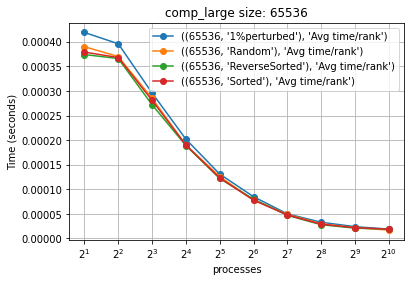

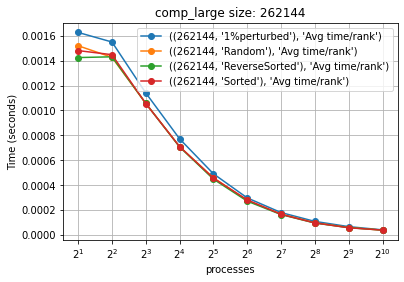

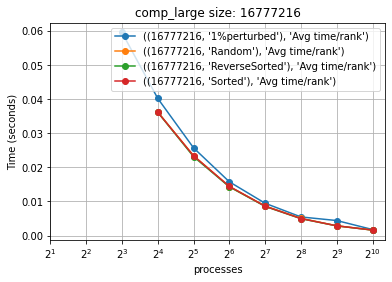

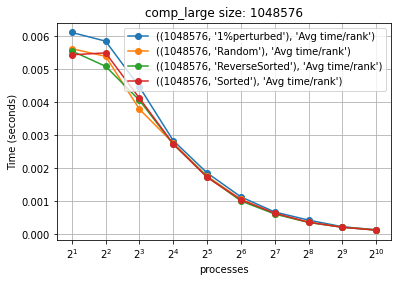

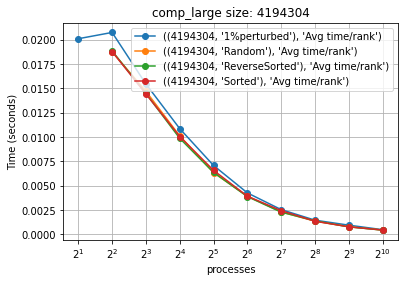

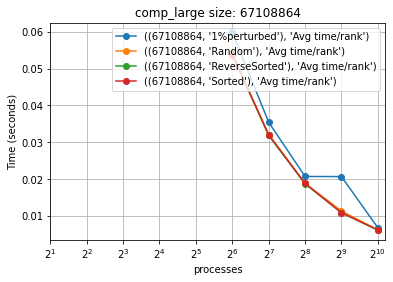

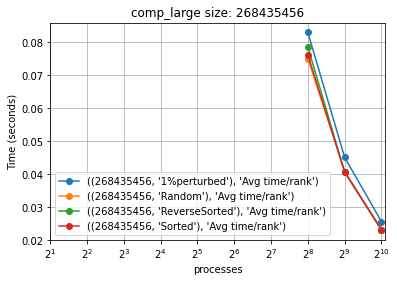

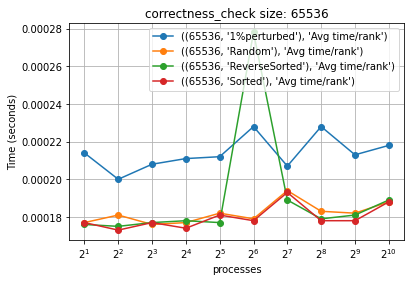

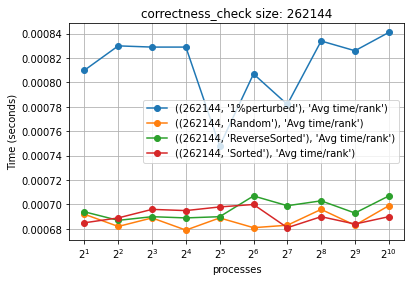

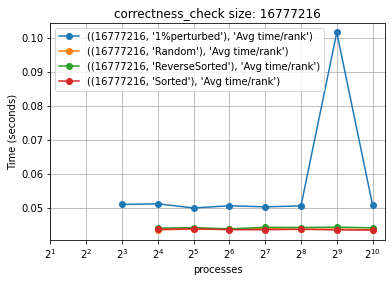

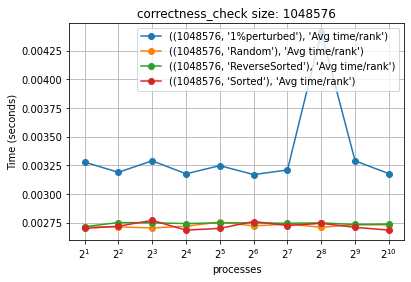

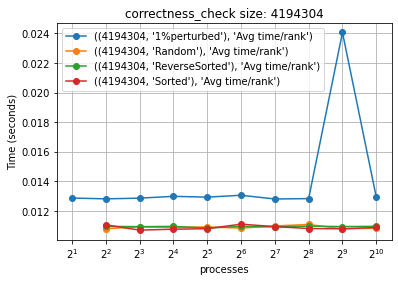

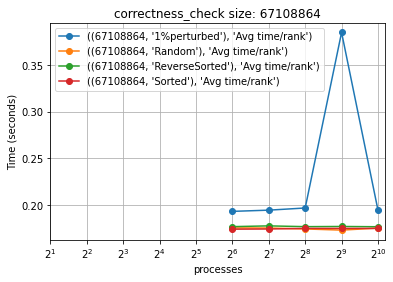

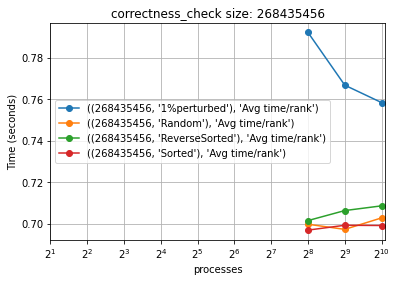

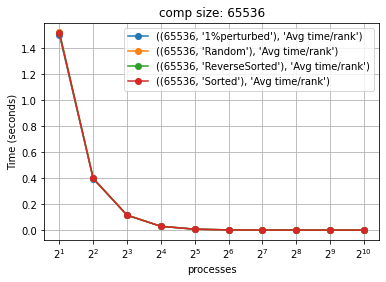

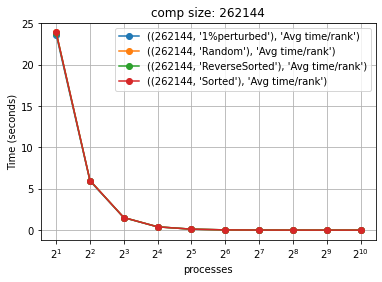

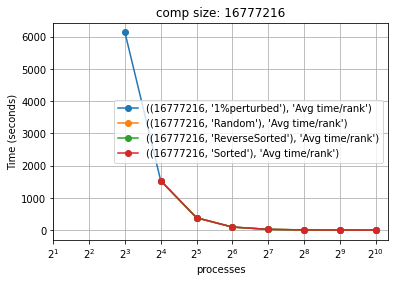

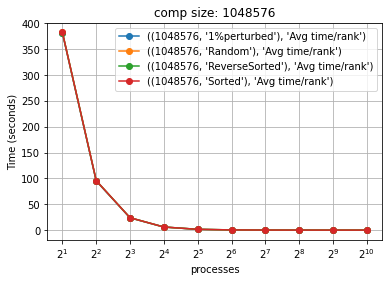

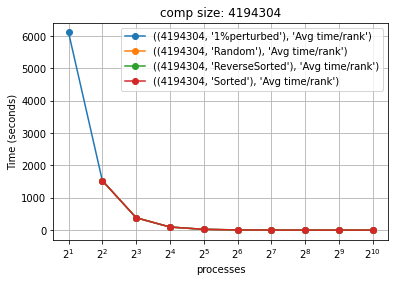

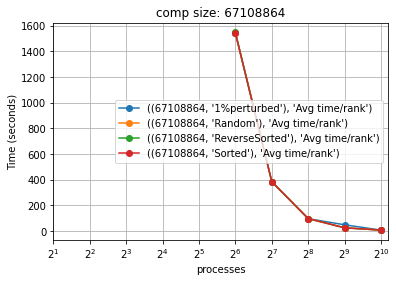

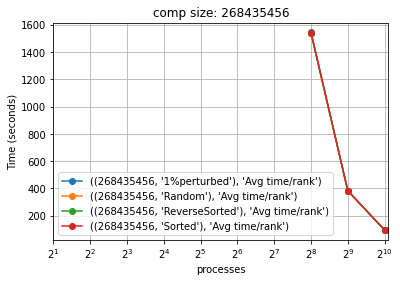

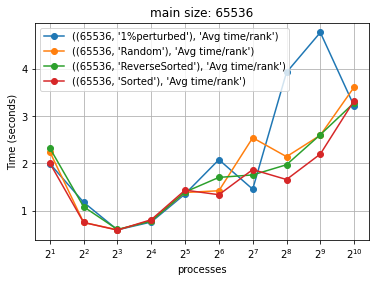

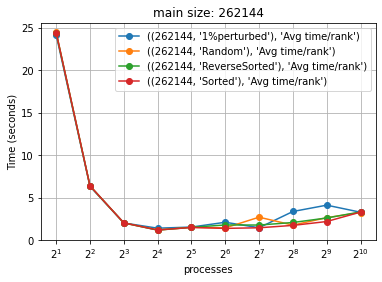

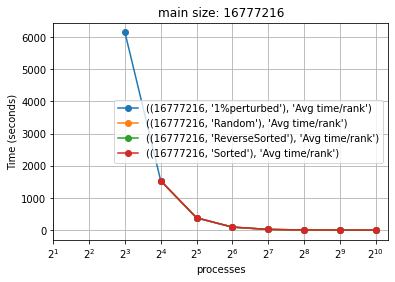

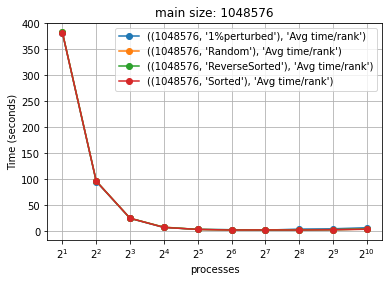

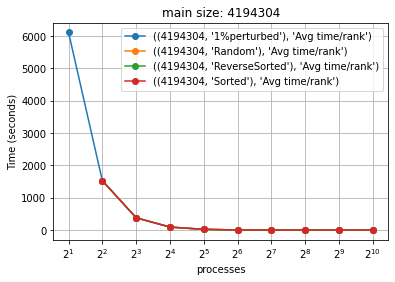

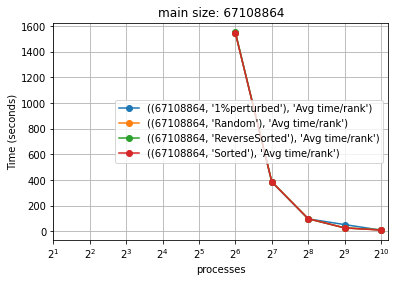

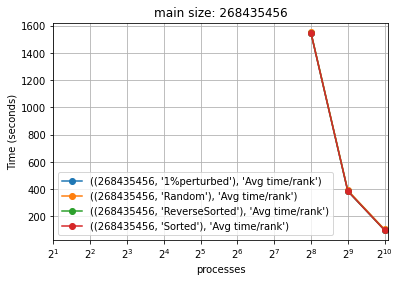

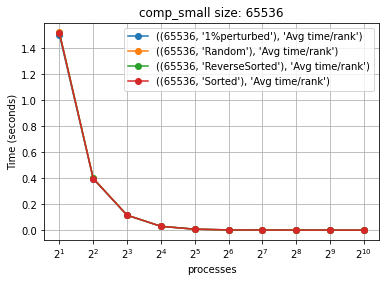

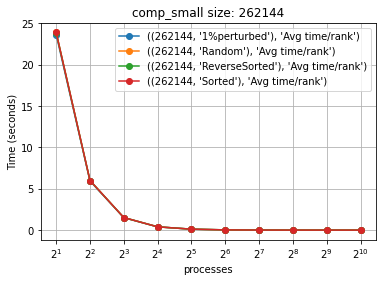

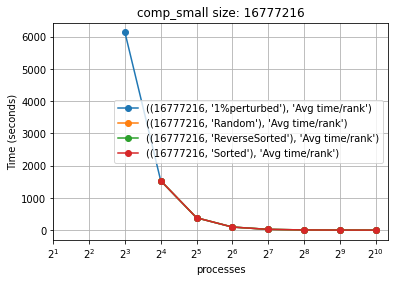

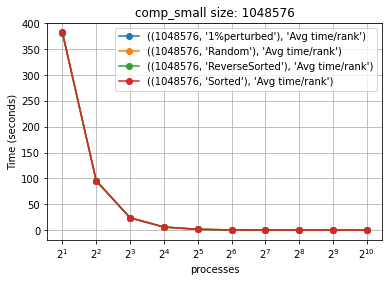

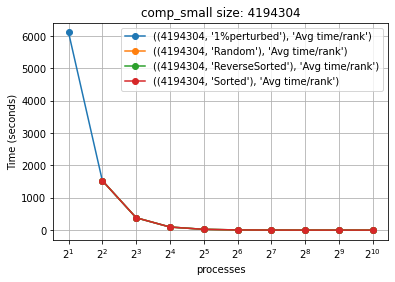

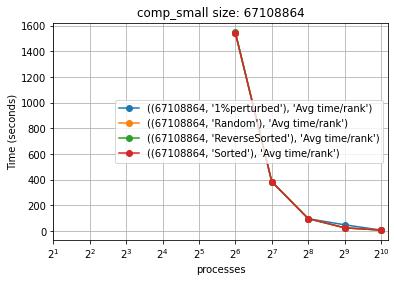

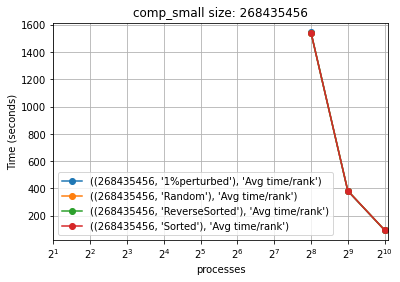

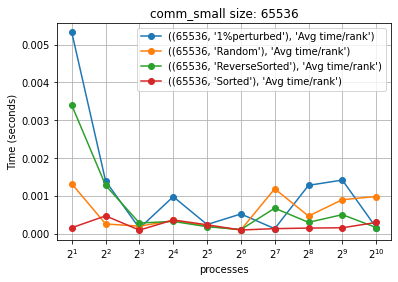

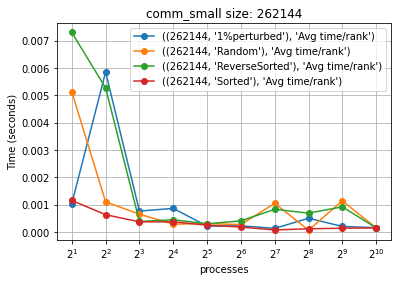

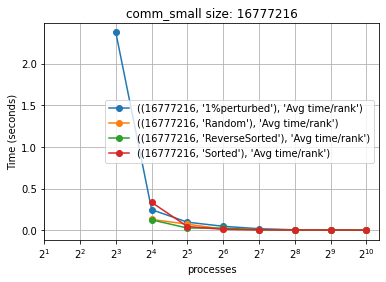

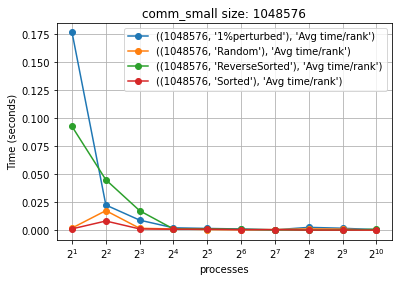

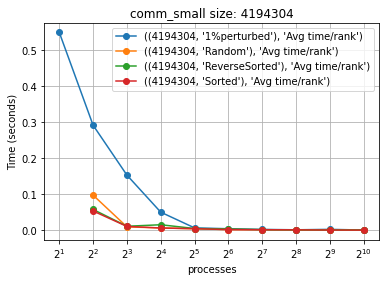

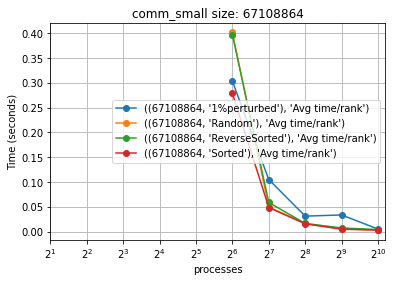

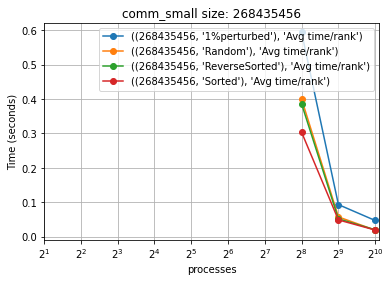

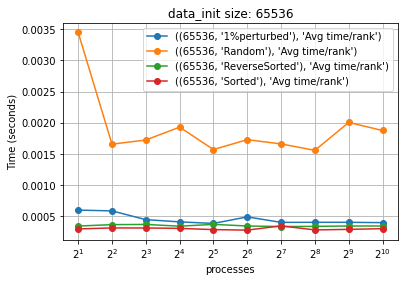

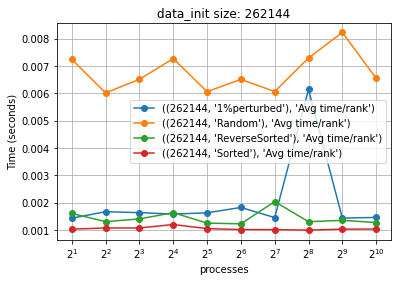

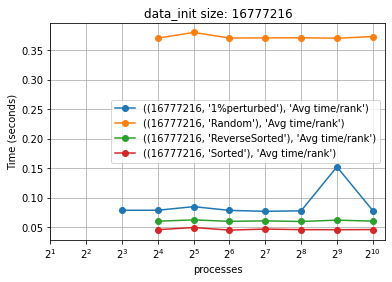

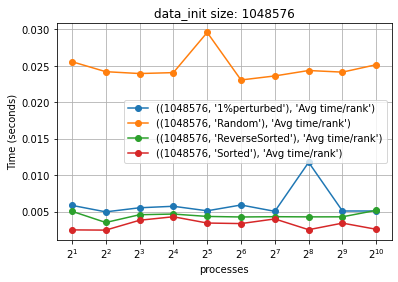

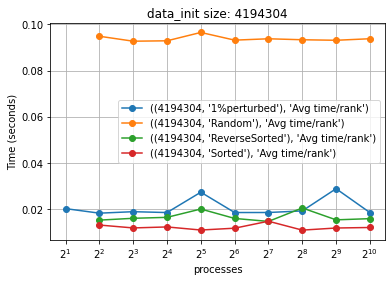

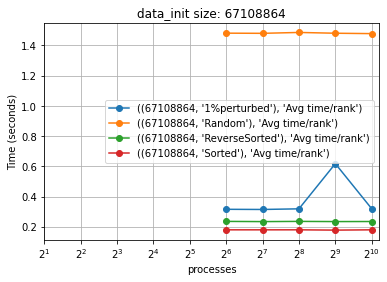

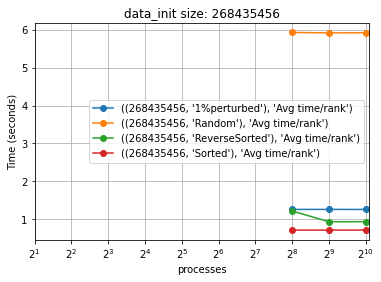

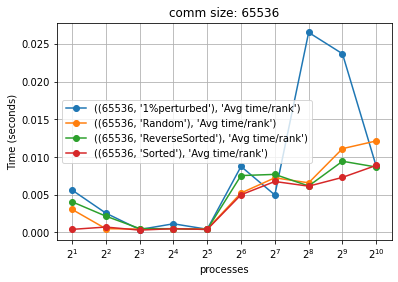

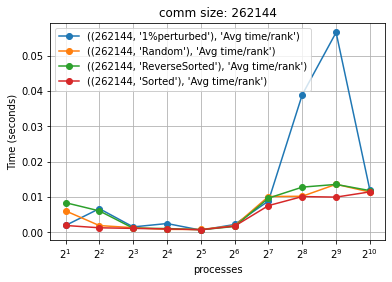

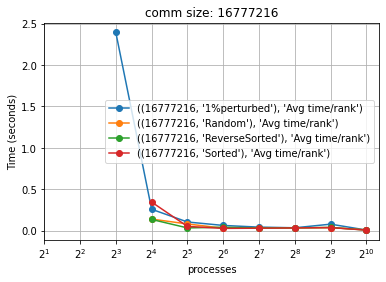

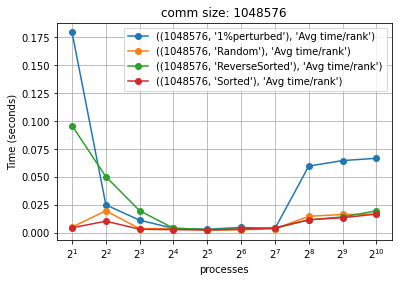

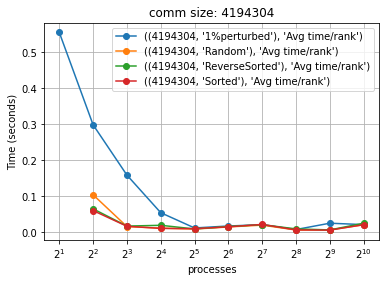

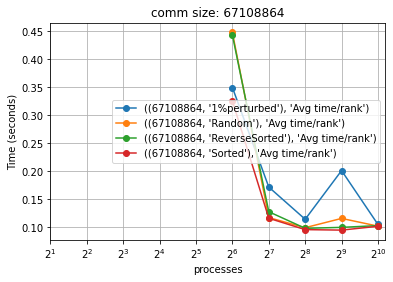

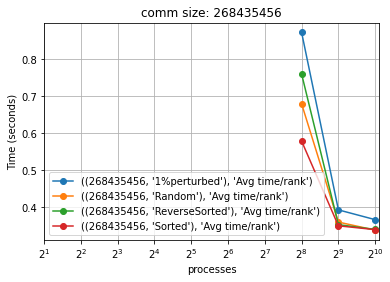

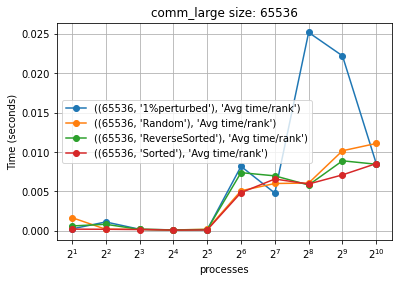

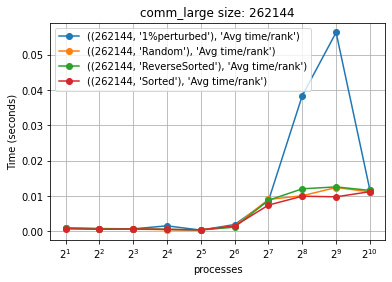

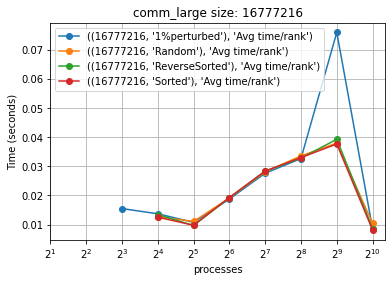

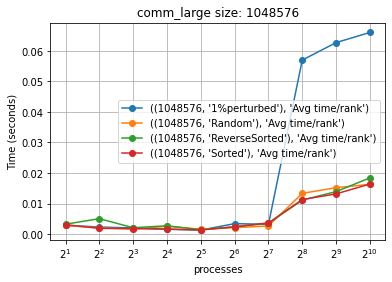

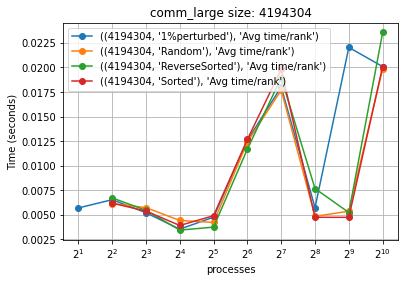

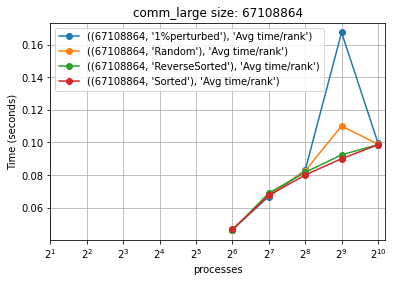

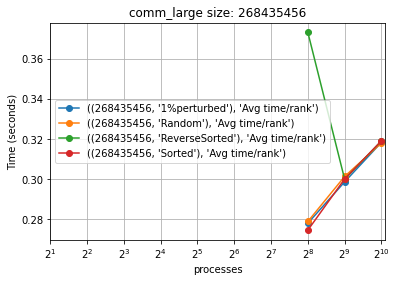

In [10]:
for name in function_names:
    for asize in array_sizes:
        tcols = [col for col in ctk.dataframe.columns if col[0][0] == asize]
        plot_mpl(
            df = ctk.dataframe.loc[name][tcols],
            title = f"{name} size: {asize}",
            xlabel = "processes",
            ylabel = "Time (seconds)"
        )

In [11]:
ctk.dataframe

(65536, 1%perturbed) (65536, Random)  \
                                   Avg time/rank   Avg time/rank   
name              num_procs                                        
main              2                     1.996786        2.247113   
                  4                     1.179709        0.753091   
                  8                     0.597387        0.598711   
                  16                    0.763438        0.794184   
                  32                    1.354808        1.386087   
                  64                    2.078367        1.422522   
                  128                   1.455862        2.541084   
                  256                   3.921271        2.142030   
                  512                   4.763545        2.594816   
                  1024                  3.209547        3.610923   
comm              2                     0.005632        0.003062   
                  4                     0.002565        0.000498   
                  8                     0.000384        0.000440   
                  16                    0.001143        0.000502   
                  32                    0.000423        0.000438   
                  64                    0.008748        0.005226   
                  128                   0.004967        0.007241   
                  256                   0.026513        0.006576   
                  512                   0.023688        0.011106   
                  1024                  0.008744        0.012130   
comm_large        2                     0.000240        0.001675   
                  4                     0.001121        0.000196   
                  8                     0.000195        0.000195   
                  16                    0.000113        0.000104   
                  32                    0.000128        0.000190   
                  64                    0.008177        0.005079   
                  128                   0.004788        0.006002   
                  256                   0.025171        0.006060   
                  512                   0.022202        0.010157   
                  1024                  0.008520        0.011084   
comm_small        2                     0.005321        0.001316   
                  4                     0.001390        0.000254   
                  8                     0.000140        0.000195   
                  16                    0.000976        0.000346   
                  32                    0.000239        0.000196   
                  64                    0.000518        0.000097   
                  128                   0.000129        0.001184   
                  256                   0.001276        0.000463   
                  512                   0.001415        0.000896   
                  1024                  0.000159        0.000980   
comp              2                     1.504943        1.522953   
                  4                     0.394702        0.398435   
                  8                     0.115015        0.115064   
                  16                    0.029694        0.029677   
                  32                    0.007173        0.007280   
                  64                    0.001762        0.001753   
                  128                   0.000466        0.000471   
                  256                   0.000148        0.000143   
                  512                   0.000065        0.000062   
                  1024                  0.000042        0.000041   
comp_large        2                     0.000419        0.000390   
                  4                     0.000396        0.000370   
                  8                     0.000296        0.000285   
                  16                    0.000202        0.000190   
                  32                    0.000131        0.000126   
                  64                    0.000085        0.000078   
                

In [12]:
# ctk.dataframe.loc[[("main", 2), ("main", 8)]]
tdf = ctk.dataframe.loc[[("comp_large", i) for i in [2, 8, 32, 128, 512]], [col for col in ctk.dataframe.columns if col[0][1] == "Random"]]

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


In [13]:
tdf

(65536, Random) (262144, Random) (1048576, Random)  \
                       Avg time/rank    Avg time/rank     Avg time/rank   
name       num_procs                                                      
comp_large 2                0.000390         0.001520          0.005624   
           8                0.000285         0.001056          0.003788   
           32               0.000126         0.000458          0.001757   
           128              0.000049         0.000166          0.000618   
           512              0.000022         0.000058          0.000209   

                     (4194304, Random) (16777216, Random) (67108864, Random)  \
                         Avg time/rank      Avg time/rank      Avg time/rank   
name       num_procs                                                           
comp_large 2                       NaN                NaN                NaN   
           8                  0.014690                NaN                NaN   
           32                 0.006331           0.023403                NaN   
           128                0.002295           0.008655           0.032043   
           512                0.000767           0.002852           0.011280   

                     (268435456, Random)  
                           Avg time/rank  
name       num_procs                      
comp_large 2                         NaN  
           8                         NaN  
           32                        NaN  
           128                       NaN  
           512                  0.040732

In [14]:
tdf.drop(columns=[((67108864, 'Random'), 'Avg time/rank'), ((268435456, 'Random'), 'Avg time/rank')])
# tdf.columns

(65536, Random) (262144, Random) (1048576, Random)  \
                       Avg time/rank    Avg time/rank     Avg time/rank   
name       num_procs                                                      
comp_large 2                0.000390         0.001520          0.005624   
           8                0.000285         0.001056          0.003788   
           32               0.000126         0.000458          0.001757   
           128              0.000049         0.000166          0.000618   
           512              0.000022         0.000058          0.000209   

                     (4194304, Random) (16777216, Random)  
                         Avg time/rank      Avg time/rank  
name       num_procs                                       
comp_large 2                       NaN                NaN  
           8                  0.014690                NaN  
           32                 0.006331           0.023403  
           128                0.002295           0.008655  
           512                0.000767           0.002852

In [15]:
weak = np.diag(tdf)
procs = [2, 8, 32, 128, 512]

In [24]:
def plot_weak(x, y, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        x,
        y,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend("comp_large")
    ax.set_ylim([0, 0.005])
    plt.grid(True)
    # plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

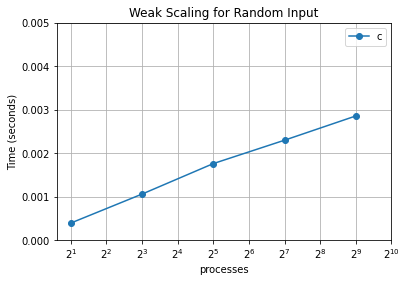

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Weak Scaling for Random Input'}, xlabel='processes', ylabel='Time (seconds)'>)

In [25]:
plot_weak(procs, 
          weak,
          title = "Weak Scaling for Random Input",
          xlabel = "processes",
          ylabel = "Time (seconds)"
         )

In [18]:
# Gets Speedups
temp_df = ctk.dataframe.loc["main"]
temp_df = temp_df.iloc[0] / temp_df
temp_df

,"(65536, 1%perturbed)","(65536, Random)","(65536, ReverseSorted)","(65536, Sorted)","(262144, 1%perturbed)","(262144, Random)","(262144, ReverseSorted)","(262144, Sorted)","(1048576, 1%perturbed)","(1048576, Random)","(1048576, ReverseSorted)","(1048576, Sorted)","(4194304, 1%perturbed)","(4194304, Random)","(4194304, ReverseSorted)","(4194304, Sorted)","(16777216, 1%perturbed)","(16777216, Random)","(16777216, ReverseSorted)","(16777216, Sorted)","(67108864, 1%perturbed)","(67108864, Random)","(67108864, ReverseSorted)","(67108864, Sorted)","(268435456, 1%perturbed)","(268435456, Random)","(268435456, ReverseSorted)","(268435456, Sorted)"
,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank
num_procs,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.692609,2.983853,2.142367,2.664017,3.830720,3.837474,3.838255,3.832163,4.007175,3.986530,3.978935,3.985747,4.001575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3.342533,3.753252,3.838393,3.390817,12.072085,12.200407,12.155624,12.123428,15.787606,15.665321,15.666301,15.647112,16.008204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,2.615518,2.829461,2.979316,2.471926,17.426056,20.767211,21.031236,20.812156,56.879199,52.316525,54.228204,56.482544,63.670051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,1.473852,1.621192,1.665040,1.398267,15.907530,16.456163,16.357817,16.552785,126.195190,132.844382,132.475412,132.493997,243.240806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,0.960748,1.579668,1.364042,1.498858,11.595430,17.205845,13.804134,17.893179,160.448914,219.624988,176.595934,220.876836,834.499722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,1.371549,0.884313,1.323708,1.073754,16.759195,9.106139,13.886696,17.013282,243.004946,184.236127,247.145861,199.930475,2058.225232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,0.509219,1.049058,1.179242,1.209419,7.207644,13.992669,11.859059,14.231672,109.694319,174.066220,225.988743,226.127861,2515.333743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
temp_df.loc[2][temp_df.columns[0]]

1.0